In [11]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.cifar10.load_data()
train_imgs, test_imgs = train_imgs / 255.0, test_imgs / 255.0

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
model = models.Sequential()

In [4]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history = model.fit(train_imgs, train_labels, epochs=10,
                    validation_data=(test_imgs, test_labels))

Epoch 1/10
1563/1563 [==============================] - 104s 66ms/step - loss: 0.8963 - accuracy: 0.6926 - val_loss: 0.9231 - val_accuracy: 0.6772
Epoch 2/10
1563/1563 [==============================] - 96s 62ms/step - loss: 0.8418 - accuracy: 0.7110 - val_loss: 0.9012 - val_accuracy: 0.6882
Epoch 3/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.7944 - accuracy: 0.7263 - val_loss: 0.8695 - val_accuracy: 0.6983
Epoch 4/10
1563/1563 [==============================] - 96s 62ms/step - loss: 0.7592 - accuracy: 0.7391 - val_loss: 0.8765 - val_accuracy: 0.7054
Epoch 5/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.7162 - accuracy: 0.7522 - val_loss: 0.8570 - val_accuracy: 0.7134
Epoch 6/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.6836 - accuracy: 0.7657 - val_loss: 0.8493 - val_accuracy: 0.7140
Epoch 7/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.6539 - accuracy: 0.7746 - val_loss: 0.8418

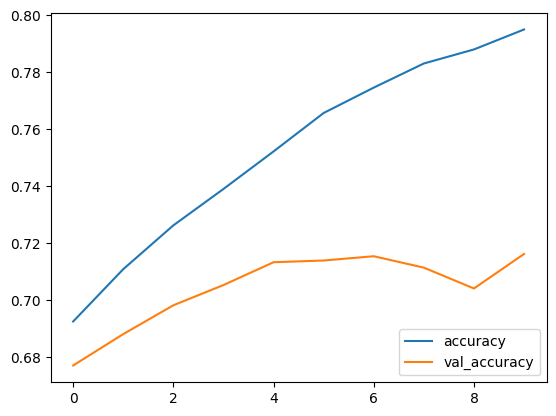

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc='lower right')